# CARDIOVASCULAR:  HEART DISEASE PREDICTION

Kevin Fossenier
April 23/2021

# PROBLEM

Heart disease is a worldwide problem and every year 100's of thousands (#1) are diagnosed with a heart condition.  Heart disease is defined as a group of conditions that affect the structure and function of the heart (#2).  These conditions can lead to heart attack or stroke or death.  In the United States, it is the leading cause of death with 1 every 4 deaths attributed to this condition (#2).  In addition, heart disease presents a sizeable financial cost to the health care systems around the world (e.g. 219billion for 2014 in US).  For these reasons, any solution to improve the outcomes would be a valuable contribution to the physical and financial health of society.  The problem is that the condition often goes undetected for years prior until it is too late.  Heart disease is often referred to as the 'silent killer'.  The ability to identify if you have the condition and provide guidance on corrective medical or lifestyle measures would be a valuable tool in reducing the number of deaths.  This use case will use routine information often collected during a annual physical or doctor's visit to help predict if that person is at risk of having heart disease.  The hypothesis for this use case is measured inputs such as height, weight, blood pressure, and glucose and cholesterol levels with self declared lifestyle inputs such as alcohol use, smoking, and activity, can accurately determine the presence of heart disease. Most if not, all of these inputs are known factors to affect heart health (#4)     

    1: https://www.cdc.gov/heartdisease/facts.htm
    2: https://www.heartandstroke.ca/heart-disease/what-is-heart-disease
    3: https://www.kaggle.com/sulianova/cardiovascular-disease-dataset
    4: https://www.webmd.com/heart/news/20171115/5-factors-can-predict-your-heart-health

# METHODOLOGY

### DATA LOAD AND CHARACTERISTICS

The problem dataset came from the Kaggle website (#3) and the ultimate data source is unknown.  Visual review of the data in excel and in this notebook quickly revealed that the dataset had a significant number of errors that need


In [38]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [39]:
# import data file
df = pd.read_csv('cardiovascular.csv', encoding="UTF-8")

In [40]:
# plot first (X) number of rows.  Default is 5 if unspecificied
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [41]:
# plot last (X) number of rows. Default is 5 if unspecificied
df.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [42]:
# dataframe overview summary information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


Features include (as of time of medical exam):
1. ID:  assigned index ID of patient
2. Age:  measured patient's age in days at time of examination
3. Gender: patient's gender (0 = male, 1 = female)
4. Height:  measured patient's height (cm) at time of examination
5. Weight:  measured patient's weight (kg) at time of examination
6. ap_hi:   measured Systolic blood pressure at time of examination (1.)
7. ap_low:  measured Diastolic blood pressure at time of examination (1.)
8. Cholesterol:  patient's relative cholesterol level at time of examination.  
    (1=normal, 2=above normal, 3=well above normal)
9. Glucose: patient's relative glucose levels at time of examination.  
    (1=normal, 2=above normal, 3 well above normal)
10. Smoke:  patient's indication if they smoke binary feature (yes OR no)
11. Alco:  patient's indication if they consume alcohol (yes OR no)
12. Active: patient's indication if they engage in physical activity (yes OR no)
13. Cardio:  presence of cardiovascular disease, binary output 
    (heart disease = 1, no heart disease = 0)

 https://en.wikipedia.org/wiki/Blood_pressure

In [43]:
# shape attribute - dimension of array of dataframe
df.shape

(70000, 13)

### DATA WRANGLING

In [44]:
# age is in days so convert to years
# create years column and convert to float value
df['years'] = (df['age'] / 365).round(4)
df['years'] = pd.to_numeric(df['years'], downcast='float')

In [45]:
# delete 'age' column because it is now redundant
df = df.drop(columns = ['age'])

In [46]:
# delete id column because it is not necessary to analysis
df = df.drop(columns = ['id'])

In [47]:
# see revised dataframe
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
0,2,168,62.0,110,80,1,1,0,0,1,0,50.391800
1,1,156,85.0,140,90,3,1,0,0,1,1,55.419201
2,1,165,64.0,130,70,3,1,0,0,0,1,51.662998
3,2,169,82.0,150,100,1,1,0,0,1,1,48.282200
4,1,156,56.0,100,60,1,1,0,0,0,0,47.874001


### DATA ANALYSIS

In [48]:
# basic summary stats of dataframe and defined quartiles
df.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,53.339325
std,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.759595
min,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.583599
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.394501
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.980801
75%,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.430099
max,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.967102


Min and Max data for 'ap_lo' and 'ap_hi' appear to be problematic since blood pressure measurements are defined within a narrow range (figure 1; #4).  Firstly, blood pressure can not be negative, so all negative values will be assumed as a possible typo and converted to their absolute value.  According, to the reference article(#5),blood pressures above 180 are potential stroke risk and the highest ever recorded value is 370/360 (ap_hi/ap_lo).  As for the low threshold, the figure below indicates a reasonable normal range.  No record of lowest ever blood pressure was found, but we know that a blood pressure of zero would indicate the person does not have a pumping heart (i.e. dead).  A value of 60 is considered low, so an initial value of >20 was arbritrarily assigned a data cutoff.  Also, systolic can not be higher than systolic because systolic is the pumping phase and diastolic is the relaxing phase.  Values where ap_hi > ap_lo will be deleted from the dataframe.

Height(cm) and weight(kg) are measured values and based on the ranges appear to include children and likely infants.  On the max side, 200kg (440lbs) weight and 2.5m (over 8ft) height, although a bit extreme, they are still possible.

4: https://en.wikipedia.org/wiki/Blood_pressure
5: https://www.scienceabc.com/eyeopeners/how-high-can-a-blood-pressure-go.html)

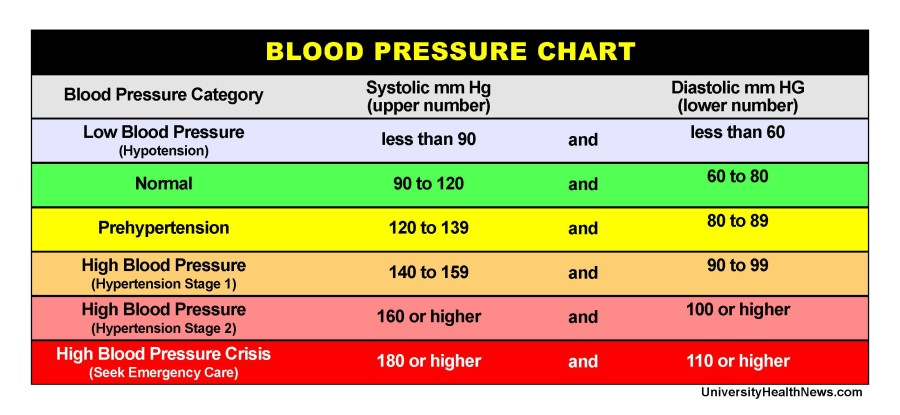

Figure 1:  Chart for adult blood pressures

In [49]:
# convert negative values for ap_hi and ap_lo as they could be a typo
df['ap_hi'] = df['ap_hi'].abs()
df['ap_lo'] = df['ap_lo'].abs()
# option to run the entire model without this conversion

In [50]:
# delete values >370 for ap_hi
# Get indexes where name column has value > 370
indexNames = df[df['ap_hi'] > 370].index

# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

In [51]:
# delete values >370 for ap_lo
# Get indexes where name column has value > 370
indexNames = df[df['ap_lo'] > 370].index
 
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

In [52]:
# delete values <20 for ap_hi
# Get indexes where name column has value <20
indexNames = df[df['ap_hi'] < 20].index
 
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

In [53]:
# delete values <20 for ap_lo
# Get indexes where name column has value <20
indexNames = df[df['ap_lo'] < 20].index
 
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

In [54]:
# delete rows where ap_hi < ap_lo :  
# not physically possible to have higher pump (ap_hi) vs return pressure (ap_lo) 
indexNames = df[df['ap_lo'] > df['ap_hi']].index
df.drop(indexNames, inplace=True)

# alternate code
# drop_criteria_ap = df[df['ap_lo'] > df['ap_hi']].index
# df.drop(drop_criteria_ap, inplace=True)

In [55]:
#  remove children from the study 
# delete values <20 for years
# Get indexes where name column has value < 20
indexNames = df[df['years'] < 20].index
 
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

In [56]:
# confirm change
df.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
count,68702.000000,68702.000000,68702.000000,68702.000000,68702.000000,68702.000000,68702.000000,68702.000000,68702.000000,68702.000000,68702.000000,68702.000000
mean,1.348665,164.361649,74.118112,126.670737,81.289773,1.364604,1.225656,0.087930,0.053332,0.803354,0.494731,53.327217
std,0.476551,8.182880,14.332258,16.700403,9.508927,0.678829,0.571501,0.283196,0.224696,0.397466,0.499976,6.762336
min,1.000000,55.000000,11.000000,24.000000,20.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.583599
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.376001
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.975300
75%,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.421902
max,2.000000,250.000000,200.000000,240.000000,182.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.967102


Invalid data points taken from subject matter knowledge have been deleted from the dataset.  

### MISSING VALUES

In [57]:
# check for missing values in each column and sum using pandas
df.isnull().sum()

gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
years          0
dtype: int64

There are no missing values in this dataframe.


### SUMMARY STATISTICS & OUTLIER ANALYSIS

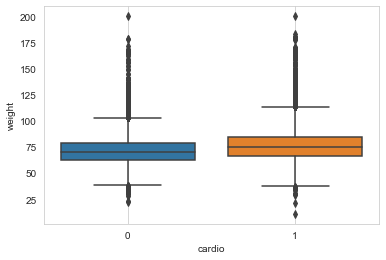

In [58]:
# boxplot using seaborn for weight (kg)
sns.boxplot(x='cardio',y='weight', data=df)
plt.grid()
plt.show()

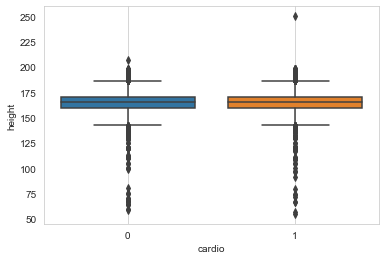

In [59]:
# violinplot using seaborn for height (cm)
sns.boxplot(x='cardio',y='height', data=df)
plt.grid()
plt.show()

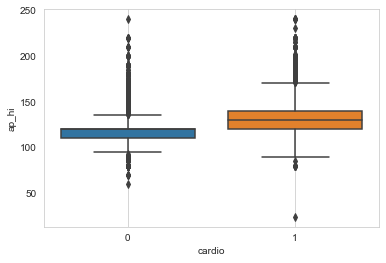

In [60]:
# violinplot using seaborn for ap_hi - systolic blood pressure
sns.boxplot(x='cardio',y='ap_hi', data=df)
plt.grid()
plt.show()

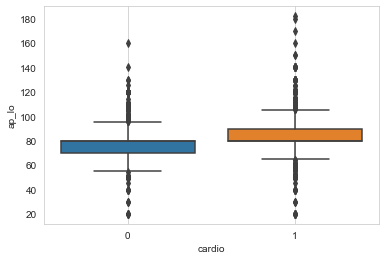

In [61]:
# violinplot using seaborn for ap_lo - systolic blood pressure
sns.boxplot(x='cardio',y='ap_lo', data=df)
plt.grid()
plt.show()

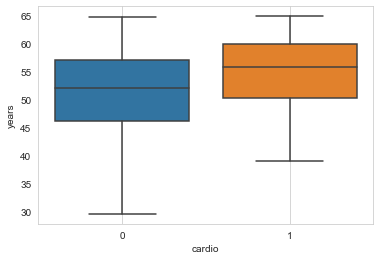

In [62]:
# violinplot using seaborn for age
sns.boxplot(x='cardio',y='years', data=df)
plt.grid()
plt.show()

All box plots except age (converted to years) appear to indicate a large number of outliers beyond what was already removed above using subject matter expertise.  None of the outliers will be removed at this time, but may be considered after the first model iteration.  There is still a fair amount of spread in the numeric data like height, weight, ap_hi, ap_lo and even years.  These will have to be considered if the model fails to produce a good result.

### UNIVARIATE DATA DISTRIBUTIONS

In [63]:
# we should know the distribution of gender (1=male, 2=female)
df['gender'].value_counts()

1    44748
2    23954
Name: gender, dtype: int64

44748 are male, 23954 female.  There is a fairly sizeable imbalance due to gender that may need to be addressed in subsequent model iterations.

<function matplotlib.pyplot.show(close=None, block=None)>

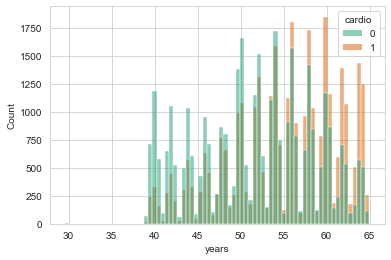

In [64]:
# distribution of patient ages in study (1= heart disease, 0 = no heart disease)
sns.histplot(df,x='years', hue='cardio', palette='Dark2')
plt.show

Very little data exists for people younger than their late abouts 38yrs old and children are typically not subject to heart disease unless they have a rare condition.  This is expected since most young people are healthy.  This may be a place to truncate the data for those younger than 38, should the model not be a very effective predictor in the firt round.  

<function matplotlib.pyplot.show(close=None, block=None)>

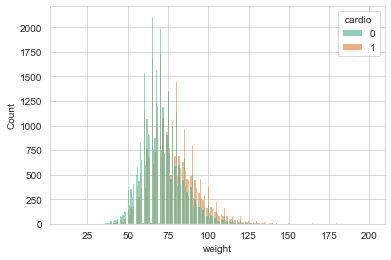

In [65]:
# distribution of patient weight in study (1= heart disease, 0 = no heart disease)
sns.histplot(df,x='weight', hue='cardio', palette='Dark2')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

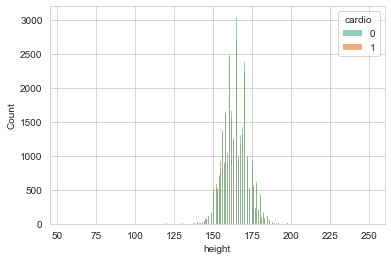

In [66]:
# distribution of patient height in study (1= heart disease, 0 = no heart disease)
sns.histplot(df,x='height', hue='cardio', palette='Dark2')
plt.show

Weight (kg) and height (cm) shows a nice normal distribution.  Heart disease occurence for weight overlaps evenly on the lower end of the weight disribution, but expected more heart disease occurs as the weight climbs above 75kg.  Height and weight should be fairly well correlated and could be combined into one input by calculating body mass index or ratio.

<function matplotlib.pyplot.show(close=None, block=None)>

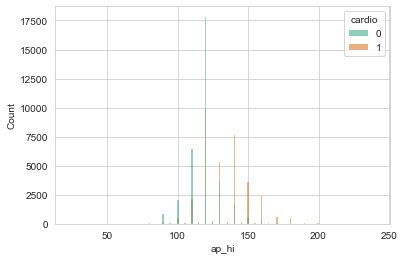

In [67]:
# distribution of patient height in study (1= heart disease, 0 = no heart disease)
sns.histplot(df,x='ap_hi', hue='cardio', palette='Dark2')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

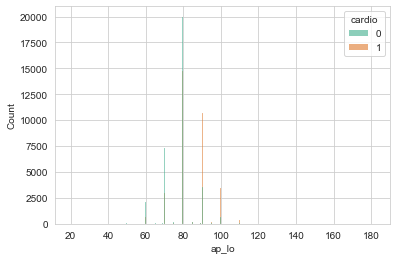

In [68]:
# distribution of patient height in study (1= heart disease, 0 = no heart disease)
sns.histplot(df,x='ap_lo', hue='cardio', palette='Dark2')
plt.show

Blood pressure inputs, ap_hi (systolic) and ap_lo(diastolic) appear to have a narrow range of outputs, and within that range the numbers appear to be heavily biased to round numbers (e.g. ap_lo has almost all occurrences at 60, 70, 80, 90 and 100).  This calls into question the accuracy of these measurements.  Either the device or the person taking the measurement is the source of the problem.  Given the large number of very obvious errors (i.e. negative values, blood pressures >1000, or almost zero, etc.) that were deleted from the dataset earlier, it would seem likely that the individuals taking the measurements are the likely the source of the problem.  

In [69]:
# skewness of data
df.skew()

gender         0.635143
height        -0.610399
weight         1.008474
ap_hi          0.931186
ap_lo          0.300939
cholesterol    1.596907
gluc           2.403847
smoke          2.910223
alco           3.975874
active        -1.526484
cardio         0.021078
years         -0.305943
dtype: float64

A zero values indicates no skewness.  Values between -1(negative; to the left) and 1(positive; to the right) are generally considered only moderately skewed.  'Weight' is moderate positively skewed.  "Cholesterol', 'gluc', 'smoke', and 'alco' are positively skewed, but these are ordinal values and their distributions may not be as meaningful given some are self-declared or subject to interpretation.  Only 'active' is negatively skewed, but again it is an 'ordinal' value that is self-declared.  Based on the univariate plots distributions and skewness results, the distributions appear to be roughly normally distributed.

### BIVARIATE ANALYSIS

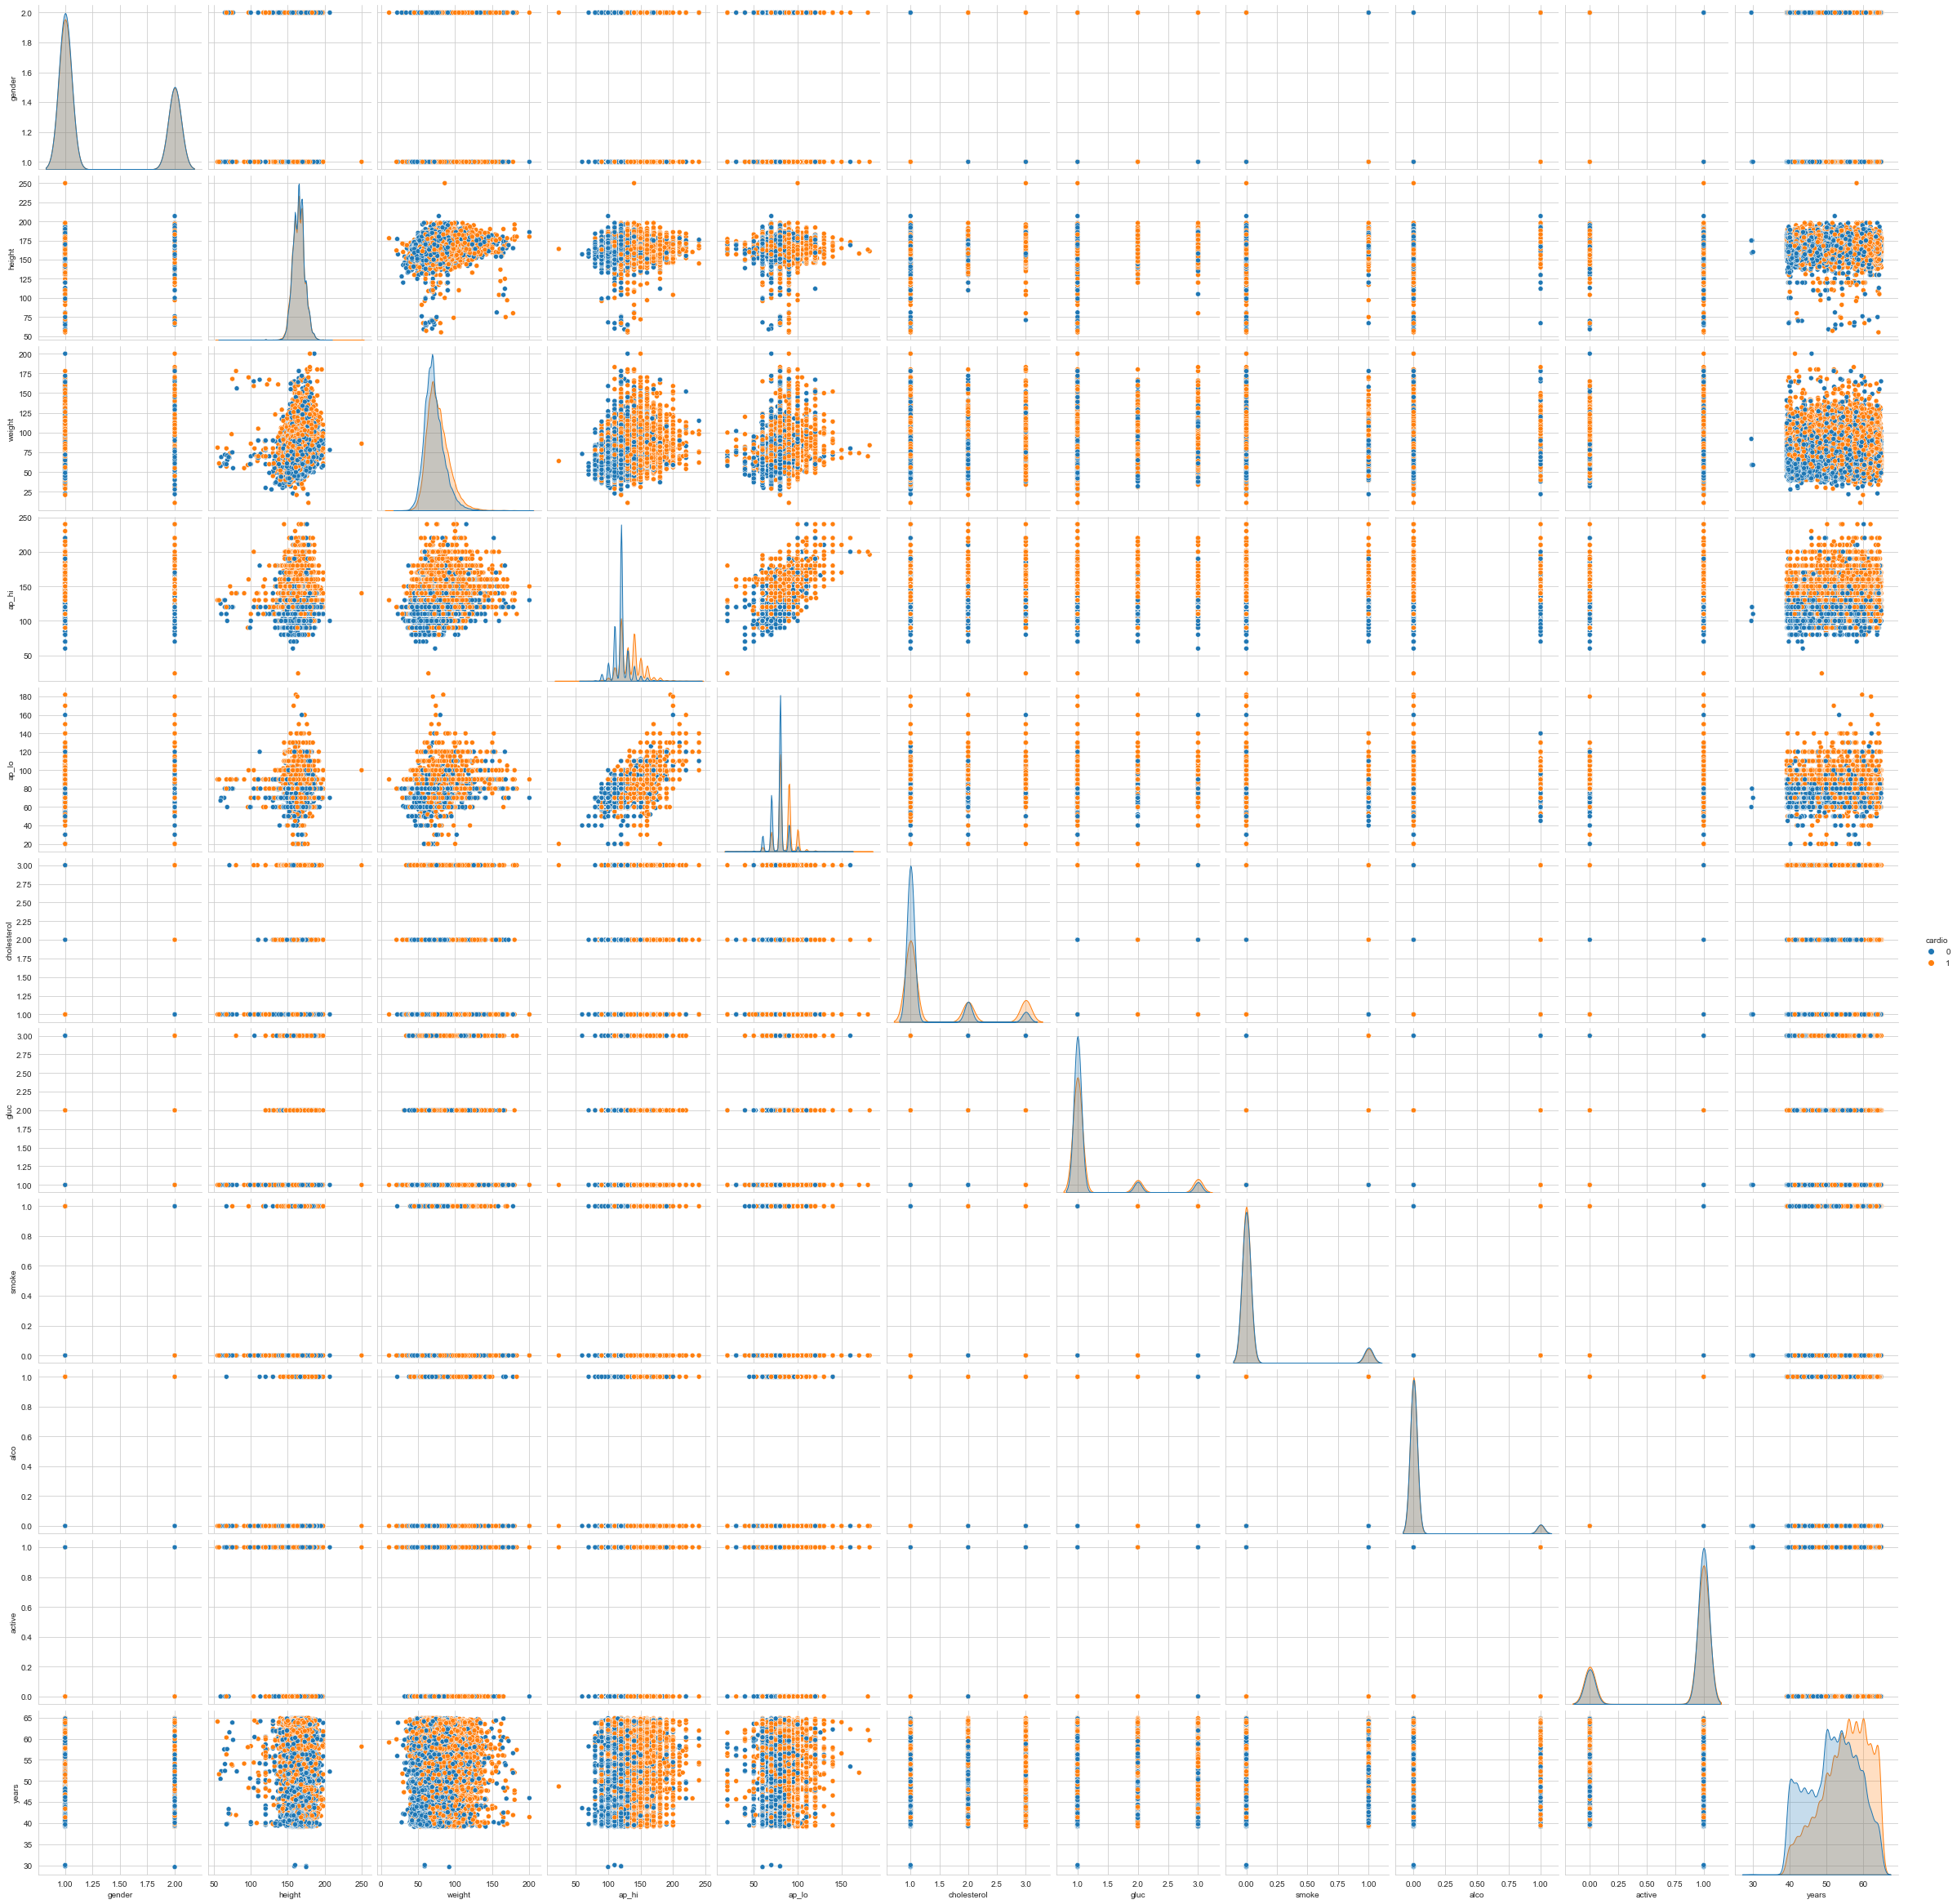

In [70]:
# run bivariate analysis grid to visualize relationships with revised dataset
sns.set_style('whitegrid')
sns.pairplot(df,hue='cardio',height=3)
plt.show()

### CORRELATION

It is important to know the difference between correlation and causation.  Correlation is a measure of the extent of interdependence between variables,  and causation is the relationship between cause and effect between two variables. Pearson Correlation (#1) measures the linear dependence between two variables X and Y and is summarized:

    1. >0 and <=1 positive linear correlation, increasing towards 1 
    2. 0 (or near zero):, no correlation positive correlation 
    3. <0 and >= -1: negative linear correlation, increasing towards -1.
    
The P-value (ref 1) is the probability value that the correlation between two variables is statistically significant. By convention, a significance level of 0.05 is used (i.e. 95% confidence) to determine the correlation between the two variables is significant. Interpreting the p-values is as follows: 
p-value < 0.001: strong evidence that the correlation is significant. p-value < 0.05: there is moderate evidence that the correlation is statistically significant. p-value > 0.1: low evidence that the correlation is significant. p-value is > 0.1: no evidence that the correlation is significant.

1: https://en.wikipedia.org/wiki/P-value


In [71]:
# pearsons correlation coefficient
df.corr()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
gender,1.000000,0.499019,0.155870,0.062097,0.066957,-0.036838,-0.021290,0.338742,0.171209,0.005799,0.007222,-0.023173
height,0.499019,1.000000,0.291608,0.018637,0.035362,-0.050660,-0.018715,0.188231,0.094594,-0.007524,-0.010613,-0.081469
weight,0.155870,0.291608,1.000000,0.270869,0.252402,0.141081,0.107021,0.067033,0.067426,-0.017721,0.179638,0.054800
ap_hi,0.062097,0.018637,0.270869,1.000000,0.730964,0.195005,0.094318,0.027792,0.035556,-0.001073,0.427823,0.209451
ap_lo,0.066957,0.035362,0.252402,0.730964,1.000000,0.160823,0.074769,0.025591,0.037505,-0.000698,0.337807,0.155945
cholesterol,-0.036838,-0.050660,0.141081,0.195005,0.160823,1.000000,0.450595,0.009800,0.035031,0.008567,0.221362,0.155203
gluc,-0.021290,-0.018715,0.107021,0.094318,0.074769,0.450595,1.000000,-0.005863,0.010337,-0.007907,0.089565,0.098799
smoke,0.338742,0.188231,0.067033,0.027792,0.025591,0.009800,-0.005863,1.000000,0.340563,0.025338,-0.016311,-0.047669
alco,0.171209,0.094594,0.067426,0.035556,0.037505,0.035031,0.010337,0.340563,1.000000,0.024531,-0.008771,-0.028805
active,0.005799,-0.007524,-0.017721,-0.001073,-0.000698,0.008567,-0.007907,0.025338,0.024531,1.000000,-0.037369,-0.010152


<AxesSubplot:>

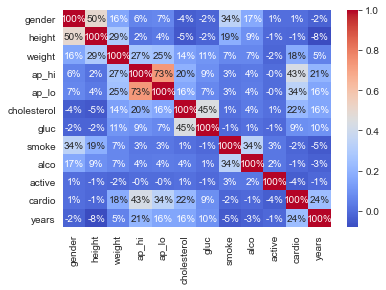

In [72]:
# annotated heatmap above correlation matrix
# sns.heatmap(df.corr(), annot=True, fmt='cmp', cmap='coolwarm')
sns.heatmap(df.corr(), annot=True, fmt='.0%', cmap='coolwarm')

Based on the correlation heatmap and index, there are are virtually no variables that are significantly correlated (negative or positive).  Blood pressure inputs 'ap_hi' and 'ap_lo' are highly correlated (73%), but that was expected given they are two parts of the same analysis.    Gender and height are only weakly positive correlated (50%).  The cholesterol and glucose is very weakly correlated.  Unexpectedly, heigh and weight has a very weak corrlations.  No input variables are highly correlated to the target, 'cardio', but ap_hi did exhibit a weak correlation (43%)

### TARGET DATA

In [73]:
# count number of individuals of with and without heart disease (1= heart disease, 0 = no heart disease)
df['cardio'].value_counts()

0    34713
1    33989
Name: cardio, dtype: int64

<AxesSubplot:xlabel='cardio', ylabel='count'>

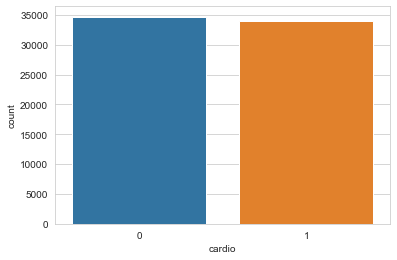

In [74]:
sns.set_style('whitegrid')
sns.countplot(x='cardio', data=df)

34,713 individuals do not have cardio disease(0)
33,989 individuals do have cardio disease(1)
Overall the target ('cardio) classes are balanced.


In [75]:
# save wrangled file for future use
df.to_csv(r'C:\Users\14038\jupyter_projects\cardiovascular\cardio_wrangle.csv', index=False)

## MODEL BUILD & OUTPUT

### Feature Preprocessing

In [76]:
from sklearn import preprocessing 
# label encoder converts labels into numeric form 
# so the machine can read the data
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

In [77]:
# split dataset into feature and target data
x = df.drop(columns=['cardio']) # input features
y = df['cardio'] # target

In [78]:
# Split the data for Training (_train) and Testing (_test)
# Train = 80%
# Test = 20%
from sklearn.model_selection import train_test_split

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 1)

In [80]:
# feature scaling
# scale values using standard scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [81]:
x_train = sc.fit_transform(x_train) # fit and transform
x_test = sc.transform(x_test) # only transform the data

## MODEL RUN #1

In [82]:
# use random forest classifier
from sklearn.ensemble import RandomForestClassifier
RFmodel = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 1)
RFmodel.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1)

In [83]:
# test model accuracy on train data
RFmodel.score(x_train, y_train.ravel()) 

0.9795127454012845

<AxesSubplot:>

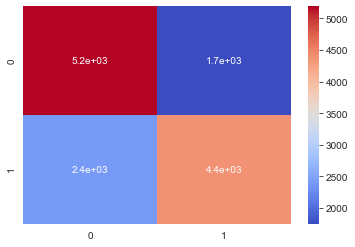

In [84]:
# run model on test data
from sklearn.metrics import confusion_matrix

# y_test actual target vs what model.predict thinks actual values from inputs (x_test)
cm = confusion_matrix(y_test, RFmodel.predict(x_test)) 

# setup the confusion matrix
TN = cm[1][1] # true negative
TP = cm[0][0] # true positive
FN = cm[0][1] # false negative
FP = cm[1][0] # false positive  

#print confusion matrix
sns.heatmap(cm, annot=True, cmap='coolwarm')   


In [85]:
# find accuracy of logistic regression model on test data
# print accuracy metric 
print("RandomForest Test Accuracy: ", RFmodel.score(x_test, y_test)* 100, "%")
# print model accuracy
print('RandomForest Model Test Accuracy = {}'. format((TP + TN)/(TP + TN + FN + FP)))

RandomForest Test Accuracy:  69.75474856269558 %
RandomForest Model Test Accuracy = 0.6975474856269558


In [86]:
# Logistic Regression import and define as model
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression()

In [87]:
# train the data using above Logistic Regression model
LRmodel.fit(x_train, y_train)

LogisticRegression()

In [88]:
# test model accuracy on train data
LRmodel.score(x_train, y_train) 

0.7288077000054585

<AxesSubplot:>

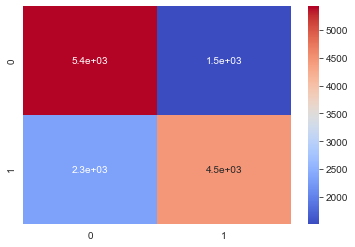

In [89]:
# CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, LRmodel.predict(x_test))
TN = cm[1][1] # true negative
TP = cm[0][0] # true positive
FN = cm[0][1] # false negative
FP = cm[1][0] # false positive                      

#print confusion matrix
sns.heatmap(cm, annot=True, cmap='coolwarm')             

In [90]:
# find accuracy of logistic regression model on test data
# print accuracy metric 
print("Logistic Regression Accuracy: ", LRmodel.score(x_test, y_test)* 100, "%")

# print model accuracy ((TP+TN)/population_
print('Model Test Accuracy = {}'. format((TP + TN)/(TP + TN + FN + FP)))

Logistic Regression Accuracy:  72.01077068626738 %
Model Test Accuracy = 0.7201077068626738


Fair performance for Logisitic Regression with 73% accuracy in both train and test data.  Confusion matrix appears to show some imbalance for the prediction error types (false negative vs false positive) which could point to a possible problem specific to the dataset or how the algorithm handles the data.

In [91]:
# KNN (K nearest neighbors) model import and define as model
from sklearn.neighbors import KNeighborsClassifier
KNNmodel = KNeighborsClassifier() 

In [92]:
# train the data using above KNN model
KNNmodel.fit(x_train, y_train)

KNeighborsClassifier()

In [93]:
# test model accuracy on train data
KNNmodel.score(x_train, y_train) 

0.7861756518258401

<AxesSubplot:>

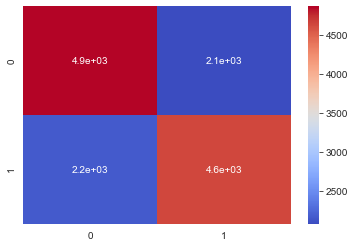

In [94]:
# CONFUSION MATRIX
cm = confusion_matrix(y_test, KNNmodel.predict(x_test))
TN = cm[1][1] # true negative
TP = cm[0][0] # true positive
FN = cm[0][1] # false negative
FP = cm[1][0] # false positive                      

#print confusion matrix
sns.heatmap(cm, annot=True, cmap='coolwarm')   

In [95]:
# find accuracy of KNN model on test data
# print accuracy metric 
print("KNN Accuracy: ", KNNmodel.score(x_test, y_test)* 100, "%")

# print model accuracy ((TP+TN)/population_
print('Model Test Accuracy = {}'. format((TP + TN)/(TP + TN + FN + FP)))

KNN Accuracy:  69.13616185139364 %
Model Test Accuracy = 0.6913616185139364


Fair to poor performance for KNN with 79% accuracy on train and 70% on test data.  Confusion matrix appears to be relatively balanced with respect to the false negative (type 2 error) and false positive (type 2 error) suggests there isn't a specific issue with the dataset. 

In [96]:
# Linear Discriminant Analysis (LDA) import and define as model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDAmodel = LinearDiscriminantAnalysis()

In [97]:
# train the data using above Liinear Discriminant Analysis
LDAmodel.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [98]:
# find accuracy of LDA model on test data
# print accuracy metric 
print("LDA Accuracy: ", LDAmodel.score(x_test, y_test)* 100, "%")

LDA Accuracy:  72.05443563059457 %


<AxesSubplot:>

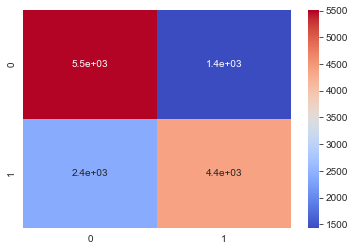

In [99]:
# CONFUSION MATRIX
cm = confusion_matrix(y_test, LDAmodel.predict(x_test))
TN = cm[1][1] # true negative
TP = cm[0][0] # true positive
FN = cm[0][1] # false negative
FP = cm[1][0] # false positive                      

#print confusion matrix
sns.heatmap(cm, annot=True, cmap='coolwarm')   

In [100]:
# print model accuracy ((TP+TN)/population_
print('Model Test Accuracy = {}'. format((TP + TN)/(TP + TN + FN + FP)))

Model Test Accuracy = 0.7205443563059457


Fair performance for Logisitic Regression with 73% accuracy in both train and test data.  Confusion matrix appears to show a relatively high imbalance for the prediction error types (false negative vs false positive) suggesting a possible problem with specific to the dataset or how the algorithm handles the data.

The dataset was manually resampled several times with the above sklearn train_test_split and yielded very similar results (i.e. within 1%) in each iteration.  Overall Logistic Regression Classifier and Linear Discriminant Analysis performed the best and were consistent in both the train and testing predictions.  Random Forest and KNN did not perform as well and there was more variance in the train and test predictions.  The confusion matrix for LRC and LDA showed some imbalance in the amount of prediction error type (FP or FN), but overall these models will be used in the next iteration of the model.

### RESCALE DATA

In [101]:
# confirm dataset characteristics to determine if changes are required
df.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
count,68702.000000,68702.000000,68702.000000,68702.000000,68702.000000,68702.000000,68702.000000,68702.000000,68702.000000,68702.000000,68702.000000,68702.000000
mean,1.348665,164.361649,74.118112,126.670737,81.289773,1.364604,1.225656,0.087930,0.053332,0.803354,0.494731,53.327217
std,0.476551,8.182880,14.332258,16.700403,9.508927,0.678829,0.571501,0.283196,0.224696,0.397466,0.499976,6.762336
min,1.000000,55.000000,11.000000,24.000000,20.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.583599
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.376001
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.975300
75%,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.421902
max,2.000000,250.000000,200.000000,240.000000,182.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.967102


In [102]:
# split dataset into feature and target data
x = df.drop(columns=['cardio']) # input features
y = df['cardio'] # target

In [103]:
# Split the data for Training (_train) and Testing (_test)
# Train = 80%
# Test = 20%
from sklearn.model_selection import train_test_split

In [104]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 1)

In [105]:
# rescale data using scaler that handles outliers better
# scale values using robust scaler 
from sklearn.preprocessing import RobustScaler
rbsc = RobustScaler()

In [106]:
x_train = rbsc.fit_transform(x_train) # fit and transform
x_test = rbsc.transform(x_test) # only transform the data

### MODEL RUN 2

In [107]:
# Logistic Regression import and define as model
from sklearn.linear_model import LogisticRegression
LRmodel2 = LogisticRegression()

In [108]:
# train the data using above Logistic Regression model
LRmodel2.fit(x_train, y_train)

LogisticRegression()

In [109]:
# test model accuracy on train data
LRmodel2.score(x_train, y_train) 

0.728844089445243

In [110]:
# find accuracy of logistic regression model on test data
# print accuracy metric 
print("Logistic Regression Accuracy: ", LRmodel2.score(x_test, y_test)* 100, "%")

Logistic Regression Accuracy:  72.01077068626738 %


<AxesSubplot:>

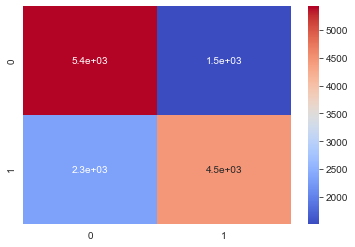

In [111]:
# CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, LRmodel2.predict(x_test))
TN = cm[1][1] # true negative
TP = cm[0][0] # true positive
FN = cm[0][1] # false negative
FP = cm[1][0] # false positive                      

#print confusion matrix
sns.heatmap(cm, annot=True, cmap='coolwarm')             

In [112]:
# print model accuracy ((TP+TN)/population_
print('Model Test Accuracy = {}'. format((TP + TN)/(TP + TN + FN + FP)))

Model Test Accuracy = 0.7201077068626738


In [113]:
# Linear Discriminant Analysis (LDA) import and define as model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDAmodel2 = LinearDiscriminantAnalysis()

In [114]:
# train the data using above Liinear Discriminant Analysis
LDAmodel2.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [115]:
# find accuracy of LDA model on test data
# print accuracy metric 
print("LDA Accuracy: ", LDAmodel2.score(x_test, y_test)* 100, "%")

LDA Accuracy:  72.05443563059457 %


<AxesSubplot:>

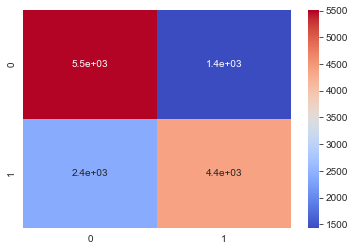

In [116]:
# CONFUSION MATRIX
cm = confusion_matrix(y_test, LDAmodel2.predict(x_test))
TN = cm[1][1] # true negative
TP = cm[0][0] # true positive
FN = cm[0][1] # false negative
FP = cm[1][0] # false positive                      

#print confusion matrix
sns.heatmap(cm, annot=True, cmap='coolwarm')   

In [117]:
# print model accuracy ((TP+TN)/population_
print('Model Test Accuracy = {}'. format((TP + TN)/(TP + TN + FN + FP)))

Model Test Accuracy = 0.7205443563059457


Using robust scaler produced virtually no change in model performance relative to first model run.  Since it offers no benefit to model predictive capacity, the standard scaler will be selected again for future model runs.

### ASSESS INPUT FEATURES

In [118]:
# assess input features for model
df.head

<bound method NDFrame.head of        gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0           2     168    62.0    110     80            1     1      0     0   
1           1     156    85.0    140     90            3     1      0     0   
2           1     165    64.0    130     70            3     1      0     0   
3           2     169    82.0    150    100            1     1      0     0   
4           1     156    56.0    100     60            1     1      0     0   
...       ...     ...     ...    ...    ...          ...   ...    ...   ...   
69995       2     168    76.0    120     80            1     1      1     0   
69996       1     158   126.0    140     90            2     2      0     0   
69997       2     183   105.0    180     90            3     1      0     1   
69998       1     163    72.0    135     80            1     2      0     0   
69999       1     170    72.0    120     80            2     1      0     0   

       active  cardio


In addition, several input features that are supposed to be ordinal (e.g. 'active', 'alco' and 'smoke')  are self-declared and their utility as a  comparison between patients is suspect at best.  All of these inputs have extremely low correlation to the target (see correlation matrix), 'cardio' and will be removed for this model iteration. 

In [119]:
# delete 'smoke', 'alco', 'activity' column 
# self-declared ordinal values with suspect value
df = df.drop(columns = ['smoke', 'alco', 'active'])

In [120]:
# confirm deleted columns
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,cardio,years
0,2,168,62.0,110,80,1,1,0,50.391800
1,1,156,85.0,140,90,3,1,1,55.419201
2,1,165,64.0,130,70,3,1,1,51.662998
3,2,169,82.0,150,100,1,1,1,48.282200
4,1,156,56.0,100,60,1,1,0,47.874001


### MODEL RUN 3

In [121]:
# split dataset into feature and target data
x = df.drop(columns=['cardio']) # input features
y = df['cardio'] # target


In [122]:
# Split the data for Training (_train) and Testing (_test)
# Train = 80%
# Test = 20%
from sklearn.model_selection import train_test_split

In [123]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 1)

In [124]:
# feature scaling
# scale values using standard scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [125]:
x_train = sc.fit_transform(x_train) # fit and transform
x_test = sc.transform(x_test) # only transform the data

In [126]:
# Logistic Regression import and define as model
from sklearn.linear_model import LogisticRegression
LRmodel3 = LogisticRegression()

In [127]:
# train the data using above Logistic Regression model
LRmodel3.fit(x_train, y_train)

LogisticRegression()

In [128]:
# test model accuracy on train data
LRmodel3.score(x_train, y_train) 

0.7263514128199996

In [129]:
# find accuracy of logistic regression model on test data
# print accuracy metric 
print("Logistic Regression Accuracy: ", LRmodel3.score(x_test, y_test)* 100, "%")

Logistic Regression Accuracy:  72.33098027800014 %


<AxesSubplot:>

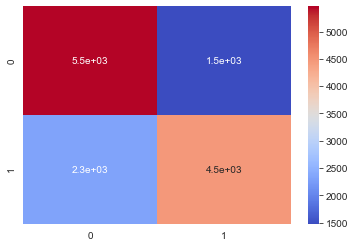

In [130]:
# CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, LRmodel3.predict(x_test))
TN = cm[1][1] # true negative
TP = cm[0][0] # true positive
FN = cm[0][1] # false negative
FP = cm[1][0] # false positive                      

#print confusion matrix
sns.heatmap(cm, annot=True, cmap='coolwarm')             

In [131]:
# print model accuracy ((TP+TN)/population_
print('Model Test Accuracy = {}'. format((TP + TN)/(TP + TN + FN + FP)))

Model Test Accuracy = 0.7233098027800015


Fair performance for Logisitic Regression with 73% accuracy in both train and test data.  Confusion matrix appears to show some imbalance for the prediction error types (false negative vs false positive) which could point to a possible problem specific to the dataset or how the algorithm handles the data.

In [132]:
# Linear Discriminant Analysis (LDA) import and define as model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDAmodel3 = LinearDiscriminantAnalysis()

In [133]:
# train the data using above Liinear Discriminant Analysis
LDAmodel3.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [134]:
# find accuracy of LDA model on test data
# print accuracy metric 
print("LDA Accuracy: ", LDAmodel3.score(x_test, y_test)* 100, "%")

LDA Accuracy:  72.23637289862455 %


<AxesSubplot:>

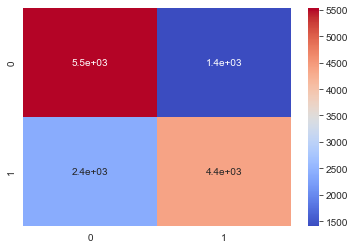

In [135]:
# CONFUSION MATRIX
cm = confusion_matrix(y_test, LDAmodel3.predict(x_test))
TN = cm[1][1] # true negative
TP = cm[0][0] # true positive
FN = cm[0][1] # false negative
FP = cm[1][0] # false positive                      

#print confusion matrix
sns.heatmap(cm, annot=True, cmap='coolwarm')   

In [136]:
# print model accuracy ((TP+TN)/population_
print('Model Test Accuracy = {}'. format((TP + TN)/(TP + TN + FN + FP)))

Model Test Accuracy = 0.7223637289862456


Removing the three ordinal input features, 'smoke', 'alco', 'active'  produced virtually no change in model performance for either LDA or LRC relative to first or second model run.  These input features appear to have little to no affect on the model and will remain out of the model

### OUTLIER REMOVAL

In [137]:
df.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,cardio,years
count,68702.000000,68702.000000,68702.000000,68702.000000,68702.000000,68702.000000,68702.000000,68702.000000,68702.000000
mean,1.348665,164.361649,74.118112,126.670737,81.289773,1.364604,1.225656,0.494731,53.327217
std,0.476551,8.182880,14.332258,16.700403,9.508927,0.678829,0.571501,0.499976,6.762336
min,1.000000,55.000000,11.000000,24.000000,20.000000,1.000000,1.000000,0.000000,29.583599
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,48.376001
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,53.975300
75%,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,1.000000,58.421902
max,2.000000,250.000000,200.000000,240.000000,182.000000,3.000000,3.000000,1.000000,64.967102


Using this table, one can also see outliers by looking at the spread spread between min or max and 25% and 75%).  In particular, height, weight, ap_hi and ap_lo have a large spread of data.  Years did not show outliers in the box plot.  'Gluc' and 'cholesterol' are measured values (glucose and cholesterol) converted to ordinal for simplification.  For this exercise only 'height', 'weight', and 'ap_hi' and 'ap_lo' values will have outliers removed

In [141]:
# remove outliers using 3 standard deviations as threshold
upper = df.mean() +3*df.std()
lower = df.mean() -3*df.std()
print(upper)
print(lower)

gender           2.776938
height         188.695486
weight         113.248809
ap_hi          176.359965
ap_lo          109.628729
cholesterol      3.392380
gluc             2.929846
cardio           1.992446
years           73.616437
dtype: float64
gender          -0.081020
height         139.964331
weight          33.918582
ap_hi           76.712105
ap_lo           52.820361
cholesterol     -0.668828
gluc            -0.483667
cardio          -1.007248
years           33.047595
dtype: float64


In [142]:
# delete values +3 std (117kg) for weight
# Get indexes where name column has value > 117kg
indexNames = df[df['weight'] > 117.115269].index
 
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

In [143]:
# delete values -3 std (31kg) for weight
# Get indexes where name column has value > 117kg
indexNames = df[df['weight'] < 31.122551].index
 
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

In [144]:
# delete values +3 std (189cm) for height
# Get indexes where name column has value > 189cm
indexNames = df[df['height'] > 188.911225].index
 
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

In [145]:
# delete values -3 std (140cm) for height
# Get indexes where name column has value < 140cm
indexNames = df[df['height'] < 139.812467].index
 
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

In [146]:
# delete values +3 std (177) for ap_hi
# Get indexes where name column has value > 177kg
indexNames = df[df['ap_hi'] > 176.772008].index
 
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

In [147]:
# delete values -3 std (76) for ap_hi
# Get indexes where name column has value < 76
indexNames = df[df['ap_hi'] < 76.570681].index
 
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

In [148]:
# delete values +3 std (110) for ap_lo
# Get indexes where name column has value > 110
indexNames = df[df['ap_lo'] > 109.817510].index
 
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

In [149]:
# delete values -3 std (53) for ap_lo
# Get indexes where name column has value < 53
indexNames = df[df['ap_lo'] < 52.762591].index
 
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

In [150]:
df.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,cardio,years
count,66468.000000,66468.000000,66468.000000,66468.000000,66468.000000,66468.000000,66468.000000,66468.000000,66468.000000
mean,1.345941,164.379310,73.432977,125.637209,80.858052,1.356803,1.220843,0.486068,53.305347
std,0.475678,7.669902,13.127394,15.047960,8.703868,0.673528,0.566958,0.499810,6.765440
min,1.000000,140.000000,32.000000,80.000000,53.000000,1.000000,1.000000,0.000000,29.583599
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,48.345200
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,53.964401
75%,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,1.000000,58.408199
max,2.000000,188.000000,117.000000,176.000000,109.000000,3.000000,3.000000,1.000000,64.967102


### MODEL RUN 4

In [151]:
# split dataset into feature and target data
x = df.drop(columns=['cardio']) # input features
y = df['cardio'] # target


In [152]:
# Split the data for Training (_train) and Testing (_test)
# Train = 80%
# Test = 20%
from sklearn.model_selection import train_test_split

In [153]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 1)

In [154]:
# feature scaling
# scale values using standard scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


In [155]:
x_train = sc.fit_transform(x_train) # fit and transform
x_test = sc.transform(x_test) # only transform the data

In [156]:
# Logistic Regression import and define as model
from sklearn.linear_model import LogisticRegression
LRmodel4 = LogisticRegression()

In [157]:
# train the data using above Logistic Regression model
LRmodel4.fit(x_train, y_train)

LogisticRegression()

In [158]:
# test model accuracy on train data
LRmodel4.score(x_train, y_train) 

0.7237935833301989

<AxesSubplot:>

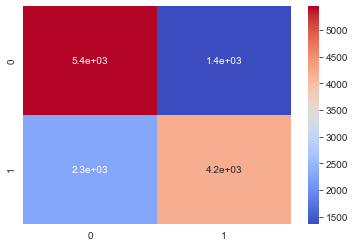

In [159]:
# CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, LRmodel4.predict(x_test))
TN = cm[1][1] # true negative
TP = cm[0][0] # true positive
FN = cm[0][1] # false negative
FP = cm[1][0] # false positive                      

#print confusion matrix
sns.heatmap(cm, annot=True, cmap='coolwarm')             

In [160]:
# find accuracy of logistic regression model on test data
# print accuracy metric 
print("Logistic Regression Accuracy: ", LRmodel4.score(x_test, y_test)* 100, "%")
# print model accuracy ((TP+TN)/population_
print('LRModel Test Accuracy = {}'. format((TP + TN)/(TP + TN + FN + FP)))

Logistic Regression Accuracy:  72.54400481420188 %
LRModel Test Accuracy = 0.7254400481420189


In [161]:
# Linear Discriminant Analysis (LDA) import and define as model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDAmodel4 = LinearDiscriminantAnalysis()

In [162]:
# train the data using above Liinear Discriminant Analysis
LDAmodel4.fit(x_train, y_train)

LinearDiscriminantAnalysis()

<AxesSubplot:>

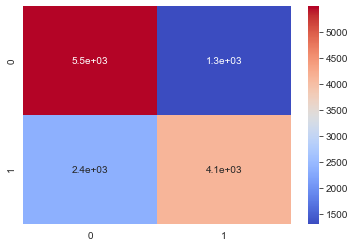

In [163]:
# CONFUSION MATRIX
cm = confusion_matrix(y_test, LDAmodel4.predict(x_test))
TN = cm[1][1] # true negative
TP = cm[0][0] # true positive
FN = cm[0][1] # false negative
FP = cm[1][0] # false positive                      

#print confusion matrix
sns.heatmap(cm, annot=True, cmap='coolwarm')   

In [164]:
# find accuracy of LDA model on test data
# print accuracy metric 
print("LDA Accuracy: ", LDAmodel4.score(x_test, y_test)* 100, "%")
# print model accuracy ((TP+TN)/population_
print('LDAModel Test Accuracy = {}'. format((TP + TN)/(TP + TN + FN + FP)))

LDA Accuracy:  72.37851662404093 %
LDAModel Test Accuracy = 0.7237851662404092


Removing values outside +/-3 standard deviations for 'weight', 'height', 'ap_hi' and 'ap_lo'  produced virtually no change in either model algorithm's performance (72 to 73%) for both algorithms relatives to the model runs 1, 2, 3.

### SUMMARY OF RESULTS

From above results, both Logisticic Regression Classifier and Linear Discriminant Analysis were virtually the same in their predictive capability was selected.  Training and testing accuracy was also virtually the same in all model runs for both algorithms.  However, neither produced a very accurate prediction model with 72 to 73%.  Both tended to exhibit a bit of imbalance in the type of prediction errors with false negative (i.e. heart disease prediction, but no actual heart disease) dominating.  For successful predictions, true positives tended to always be larger than true negatives.  Outlier removal (delete outside 3 standard deviations) for model run#4 did not produce a better accuracy for the any of the algorithms.  

## CONCLUSION

The cardiovascular problem represents a very common type of medical use case.  In these types of studies the threshold for prediction is often higher because human lives could be at risk.  Failure to predict someone that could be at risk of heart disease (type 1 error; false positive) that is a very serious error.  On the positive side, the errors were more commonly predicting heart disease when heart disease wasn't present. This means the model over predicts heart disease rather than failing to identify heart disease.  However, creating stress for a patient that doesn't have heart disease is not a successful model.

The dataset in its original form, had clear problems with blood pressure values well outside any reasonable range.  In addition, a clear pattern of blood pressure values that were dominantly in intervals of 10, suggest the accuracy of those measurements are suspect.  Lastly, the dataset included children and adults of all ages.  Children and younger adults typically do not suffer from heart disease unless they have a rare condition.  Such a condition was not provided as an input for this model.  For these reasons, the model and the dataset should not be implemented at this time

If this model is to be deployed as a primary medical screening tool for heart disease, it should be rejected in it's current form.  It could be a general classifier for survey or online webapp for a company selling a heart disease product.

### RECOMMENDATIONS

The dataset was sufficiently large enough, but was very flawed with very obvious errors.  One suspects that there were many other smaller errors and a more intensive exploratory data analysis should be done before revisiting this model. 

In terms of input features, it appeared that none were particularly useful as a prediction input.  Blood pressure 'ap_hi' did exhibit some correlation, but the data for that input had serious quality issues.  More inputs such a pulse at the time the blood pressure was taken, a resting heart rate could prove be useful to the prediction.

Glucose and cholesterol data are both measured values and cholesterol has multiple components, total, LDL or "bad cholesterol", and HDL or "good cholesterol".  Using the actual values and possibly the ratios of LDL/HDL could remove some of the bias that an ordinal input may create. The smoking, activity and alcohol inputs are far too subjective and difficult to rank relative to each patient.  Plus, people tend to under estimate their bad habits (smoking and alcohol) and over estimate their good ones (physical activity).  

More attention to acquiring new input data and ensuring the blood pressure measurements are accurately noted would likely result in a far better predictive model.

Input specific transformations to deal with skewed data (log, sqrt, boxcox) may yield better predictions than simple outlier deletion as was done in this notebook.  